https://machinelearningmastery.com/sarima-for-time-series-forecasting-in-python/

https://machinelearningmastery.com/how-to-grid-search-sarima-model-hyperparameters-for-time-series-forecasting-in-python/

# SARIMA for Time Series Forecasting in Python

Autoregressive Integrated Moving Average, or ARIMA, is one of the most widely used forecasting methods for univariate time series data forecasting.

Although the method can handle data with a trend, it does not support time series with a seasonal component.

An extension to ARIMA that supports the direct modeling of the seasonal component of the series is called SARIMA.

In this tutorial, you will discover the Seasonal Autoregressive Integrated Moving Average, or SARIMA, method for time series forecasting with univariate data containing trends and seasonality.

After completing this tutorial, you will know:

    The limitations of ARIMA when it comes to seasonal data.
    The SARIMA extension of ARIMA that explicitly models the seasonal element in univariate data.
    How to implement the SARIMA method in Python using the Statsmodels library.


#### What’s Wrong with ARIMA

Autoregressive Integrated Moving Average, or ARIMA, is a forecasting method for univariate time series data.

As its name suggests, it supports both an autoregressive and moving average elements. The integrated element refers to differencing allowing the method to support time series data with a trend.

A problem with ARIMA is that it does not support seasonal data. That is a time series with a repeating cycle.

ARIMA expects data that is either not seasonal or has the seasonal component removed, e.g. seasonally adjusted via methods such as seasonal differencing.

An alternative is to use SARIMA.
#### What is SARIMA?

Seasonal Autoregressive Integrated Moving Average, SARIMA or Seasonal ARIMA, is an extension of ARIMA that explicitly supports univariate time series data with a seasonal component.

It adds three new hyperparameters to specify the autoregression (AR), differencing (I) and moving average (MA) for the seasonal component of the series, as well as an additional parameter for the period of the seasonality.

    A seasonal ARIMA model is formed by including additional seasonal terms in the ARIMA […] The seasonal part of the model consists of terms that are very similar to the non-seasonal components of the model, but they involve backshifts of the seasonal period.

#### How to Configure SARIMA

Configuring a SARIMA requires selecting hyperparameters for both the trend and seasonal elements of the series.
Trend Elements

There are three trend elements that require configuration.

They are the same as the ARIMA model; specifically:

    p: Trend autoregression order.
    d: Trend difference order.
    q: Trend moving average order.

Seasonal Elements

There are four seasonal elements that are not part of ARIMA that must be configured; they are:

    P: Seasonal autoregressive order.
    D: Seasonal difference order.
    Q: Seasonal moving average order.
    m: The number of time steps for a single seasonal period.

Together, the notation for an SARIMA model is specified as:
SARIMA(p,d,q)(P,D,Q)m
1
	
SARIMA(p,d,q)(P,D,Q)m

Where the specifically chosen hyperparameters for a model are specified; for example:
SARIMA(3,1,0)(1,1,0)12
1
	
SARIMA(3,1,0)(1,1,0)12

Importantly, the m parameter influences the P, D, and Q parameters. For example, an m of 12 for monthly data suggests a yearly seasonal cycle.

A P=1 would make use of the first seasonally offset observation in the model, e.g. t-(m*1) or t-12. A P=2, would use the last two seasonally offset observations t-(m * 1), t-(m * 2).

Similarly, a D of 1 would calculate a first order seasonal difference and a Q=1 would use a first order errors in the model (e.g. moving average).

A seasonal ARIMA model uses differencing at a lag equal to the number of seasons (s) to remove additive seasonal effects. As with lag 1 differencing to remove a trend, the lag s differencing introduces a moving average term. The seasonal ARIMA model includes autoregressive and moving average terms at lag s.

The trend elements can be chosen through careful analysis of ACF and PACF plots looking at the correlations of recent time steps (e.g. 1, 2, 3).

Similarly, ACF and PACF plots can be analyzed to specify values for the seasonal model by looking at correlation at seasonal lag time steps.

Seasonal ARIMA models can potentially have a large number of parameters and combinations of terms. Therefore, it is appropriate to try out a wide range of models when fitting to data and choose a best fitting model using an appropriate criterion

Alternately, a grid search can be used across the trend and seasonal hyperparameters.

The Seasonal Autoregressive Integrated Moving Average, or SARIMA, model is an approach for modeling univariate time series data that may contain trend and seasonal components.

It is an effective approach for time series forecasting, although it requires careful analysis and domain expertise in order to configure the seven or more model hyperparameters.

An alternative approach to configuring the model that makes use of fast and parallel modern hardware is to grid search a suite of hyperparameter configurations in order to discover what works best. Often, this process can reveal non-intuitive model configurations that result in lower forecast error than those configurations specified through careful analysis.

#### How to use SARIMA in Python

The SARIMA time series forecasting method is supported in Python via the Statsmodels library.

To use SARIMA there are three steps, they are:

    Define the model.
    Fit the defined model.
    Make a prediction with the fit model.

Let’s look at each step in turn.

### 1. Define Model

An instance of the SARIMAX class can be created by providing the training data and a host of model configuration parameters.

The implementation is called SARIMAX instead of SARIMA because the “X” addition to the method name means that the implementation also supports exogenous variables.

These are parallel time series variates that are not modeled directly via AR, I, or MA processes, but are made available as a weighted input to the model.

Exogenous variables are optional can be specified via the “exog” argument.

The trend and seasonal hyperparameters are specified as 3 and 4 element tuples respectively to the “order” and “seasonal_order” arguments.

These elements must be specified.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [3]:
# specify training data
data = pd.read_csv('daily-min-temperatures.csv')
#data['Date'] = pd.to_datetime(data['Date']).map(lambda x: x.strftime('%Y-%M-%D'))
data['Date'] = pd.to_datetime(data['Date'])
print(data.head())
print(data.tail())
print(data.shape)

        Date  Temp
0 1981-01-01  20.7
1 1981-01-02  17.9
2 1981-01-03  18.8
3 1981-01-04  14.6
4 1981-01-05  15.8
           Date  Temp
3645 1990-12-27  14.0
3646 1990-12-28  13.6
3647 1990-12-29  13.5
3648 1990-12-30  15.7
3649 1990-12-31  13.0
(3650, 2)


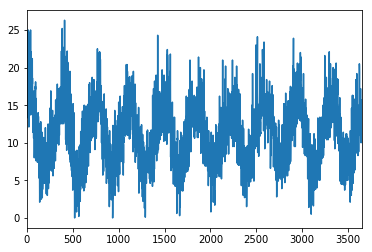

In [8]:
data['Temp'].plot()
plt.show()

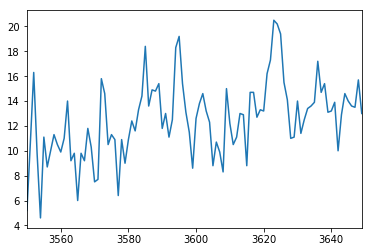

In [9]:
# plot last 100 days
data['Temp'][-100:].plot()
plt.show()

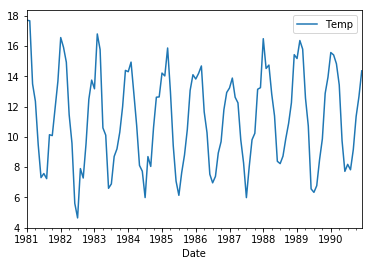

In [10]:
# resample to monthly level
data.set_index(['Date']).resample('1M').mean().plot()
plt.show()

### Develop a Grid Search Framework

we will develop a framework for grid searching SARIMA model hyperparameters for a given univariate time series forecasting problem.

We will use the implementation of SARIMA provided by the statsmodels library.

This model has hyperparameters that control the nature of the model performed for the series, trend and seasonality, specifically:

    * order: (p, d, q) parameters for the modeling of the trend.
    * sesonal_order: (P, D, Q, M) parameters for the modeling the seasonality
    * trend: A parameter for controlling a model of the deterministic trend 
        * n no trend
        * c constant
        * t linear
        * ct constant with linear trend 
        

If you know enough about your problem to specify one or more of these parameters, then you should specify them. If not, you can try grid searching these parameters.

We can start-off by defining a function that will fit a model with a given configuration and make a one-step forecast.

The sarima_forecast() below implements this behavior.

The function takes an array or list of contiguous prior observations and a list of configuration parameters used to configure the model, specifically two tuples and a string for the trend order, seasonal order trend, and parameter.

We also try to make the model robust by relaxing constraints, such as that the data must be stationary and that the MA transform be invertible.

In [11]:
def getting_sarimax_parameters(y):
    """ Parameter Selection for the ARIMA Time Series Model
    """
    import itertools
    import pandas as pd
    import numpy as np
    import warnings
    import statsmodels.api as sm
    p = d = q = range(0, 2)
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
    print('Examples of parameter combinations for Seasonal ARIMA...')
    print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
    print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
    print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
    print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))
    print('')
    p = np.arange(100000)
    d = np.arange(100000)
    q = np.arange(100000)
    S1 = np.arange(100000)
    S2 = np.arange(100000)
    S3 = np.arange(100000)
    S4 = np.arange(100000)
    AIC = np.arange(100000)
    warnings.filterwarnings("ignore")  # specify to ignore warning messages
    warnings.simplefilter("ignore")
    k = 0
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(y,
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

                results = mod.fit()
                p[k] = param[0]
                d[k] = param[1]
                q[k] = param[2]
                S1[k] = param_seasonal[0]
                S2[k] = param_seasonal[1]
                S3[k] = param_seasonal[2]
                S4[k] = param_seasonal[3]
                AIC[k] = results.aic
                k += 1
            except:
                continue
    p = p[0:k]
    d = d[0:k]
    q = q[0:k]
    S1 = S1[0:k]
    S2 = S2[0:k]
    S3 = S3[0:k]
    S4 = S4[0:k]
    AIC = AIC[0:k]
    df = pd.DataFrame({'p': p, 'd': d, 'q': q, 'S1': S1, 'S2': S2, 'S3': S3, 'S4': S4, 'AIC': AIC}).sort_values(
        by="AIC", ascending=True)
    df = df.reset_index(drop=True)
    print(df.head())
    print(
        'ARIMA{}x{} - AIC:{}'.format((df.p[0], df.d[0], df.q[0]), (df.S1[0], df.S2[0], df.S3[0], df.S4[0]), df.AIC[0]))

In [12]:
getting_sarimax_parameters(data['Temp'])

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)

   p  d  q  S1  S2  S3  S4    AIC
0  1  1  1   0   0   1  12  16772
1  1  1  1   1   0   1  12  16774
2  1  1  1   1   0   0  12  16775
3  1  1  1   0   1   1  12  16776
4  1  1  1   1   1   1  12  16778
ARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:16772


In [39]:
# define model configuration 
model = SARIMAX(data['Temp'],
                trend = 'c',
                order = (1, 1, 1),
                seasonal_order = (1, 1, 1, 30),
                enforce_stationarity = False,
                enforce_invertibility = False)

### 2. Fit Model

Once the model is created, it can be fit on the training data.

The model is fit by calling the fit() function.

Fitting the model returns an instance of the SARIMAXResults class. This object contains the details of the fit, such as the data and coefficients, as well as functions that can be used to make use of the model

In [40]:
# fit model
model_fit = model.fit()

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0006      0.003     -0.181      0.857      -0.007       0.006
ar.L1          0.4613      0.018     26.224      0.000       0.427       0.496
ma.L1         -1.0875      0.010   -109.477      0.000      -1.107      -1.068
ma.S.L30      -0.0016      0.017     -0.096      0.924      -0.034       0.031
sigma2         4.9695      0.147     33.703      0.000       4.680       5.258


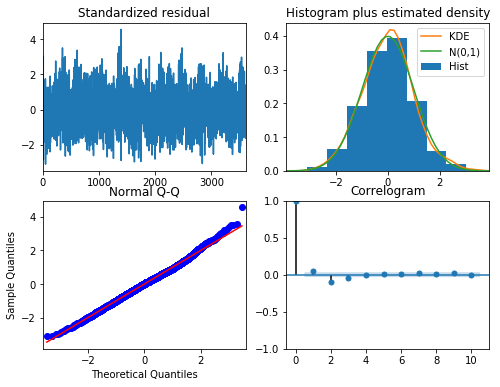

In [36]:
print(model_fit.summary().tables[1])
model_fit.plot_diagnostics(figsize=(8, 6))
plt.show()

Many elements of the fitting process can be configured, and it is worth reading the API to review these options once you are comfortable with the implementation.

### 3. Make Prediction

Once fit, the model can be used to make a forecast.

A forecast can be made by calling the forecast() or the predict() functions on the SARIMAXResults object returned from calling fit.

The forecast() function takes a single parameter that specifies the number of out of sample time steps to forecast, or assumes a one step forecast if no arguments are provided.

In [37]:
# one step forecast
yhat_one_step = model_fit.forecast()
print(yhat_one_step)

3650    13.389289
dtype: float64


In [38]:
# 100 steps forecast
steps_ = 100
yhat = model_fit.forecast(steps_)
print(yhat)

3650    13.389289
3651    13.563424
3652    13.643622
3653    13.675727
3654    13.692761
3655    13.701082
3656    13.709963
3657    13.712830
3658    13.717469
3659    13.716580
3660    13.711011
3661    13.714124
3662    13.711299
3663    13.708778
3664    13.707362
3665    13.705790
3666    13.699420
3667    13.702301
3668    13.700083
3669    13.702626
3670    13.701367
3671    13.699149
3672    13.704257
3673    13.698523
3674    13.694707
3675    13.694567
3676    13.694083
3677    13.693136
3678    13.688528
3679    13.691723
          ...    
3720    13.645269
3721    13.644164
3722    13.643059
3723    13.641954
3724    13.640850
3725    13.639745
3726    13.638640
3727    13.637535
3728    13.636430
3729    13.635325
3730    13.634220
3731    13.633116
3732    13.632011
3733    13.630906
3734    13.629801
3735    13.628696
3736    13.627591
3737    13.626486
3738    13.625381
3739    13.624277
3740    13.623172
3741    13.622067
3742    13.620962
3743    13.619857
3744    13

In [32]:
new_dates = pd.date_range(start=data['Date'][0], periods=steps_)
prediction = pd.DataFrame({'Temp':yhat, 'Date':new_dates})
prediction.head()

,Temp,Date
3650,13.384897,1981-01-01
3651,13.569179,1981-01-02
3652,13.650136,1981-01-03
3653,13.684843,1981-01-04
3654,13.712119,1981-01-05


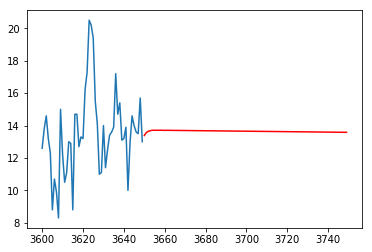

In [33]:
plt.figure()
plt.plot(data['Temp'][-50:])
plt.plot(prediction['Temp'], color='r')
plt.show()

The predict() function provides the fitted values

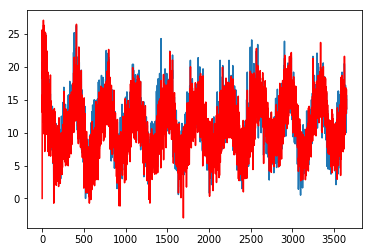

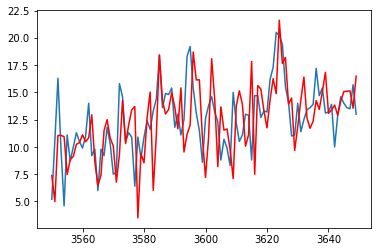

In [21]:
# obtain fitted valued
y_fitted = model_fit.predict()

plt.figure()
plt.plot(data['Temp'])
plt.plot(y_fitted, color='r')
plt.show()

plt.figure()
plt.plot(data['Temp'][-100:])
plt.plot(y_fitted[-100:], color='r')
plt.show()